# Data Mining
## Лабораторная работа 2
### Вариант 2

### выполнил: студент Айюк Эммануэль Арамп
### группы М10-415Бки-19 

В данной лабораторной работе мною будет проводиться обработка данных, обучение моделей, подбор гиперпараметров и оценка результатов.

Начнем с обработки данных. Организуем ее проведение через

# В лабораторной работе мною будет проводиться обработка данных, обучение моделей, подбор гиперпараметров и оценка результатов.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score
import pickle

# Загрузка данных из github
DATA_URL ="datasets/"

In [4]:
data=pd.read_csv(DATA_URL+ 'diabetes.csv',sep=",")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


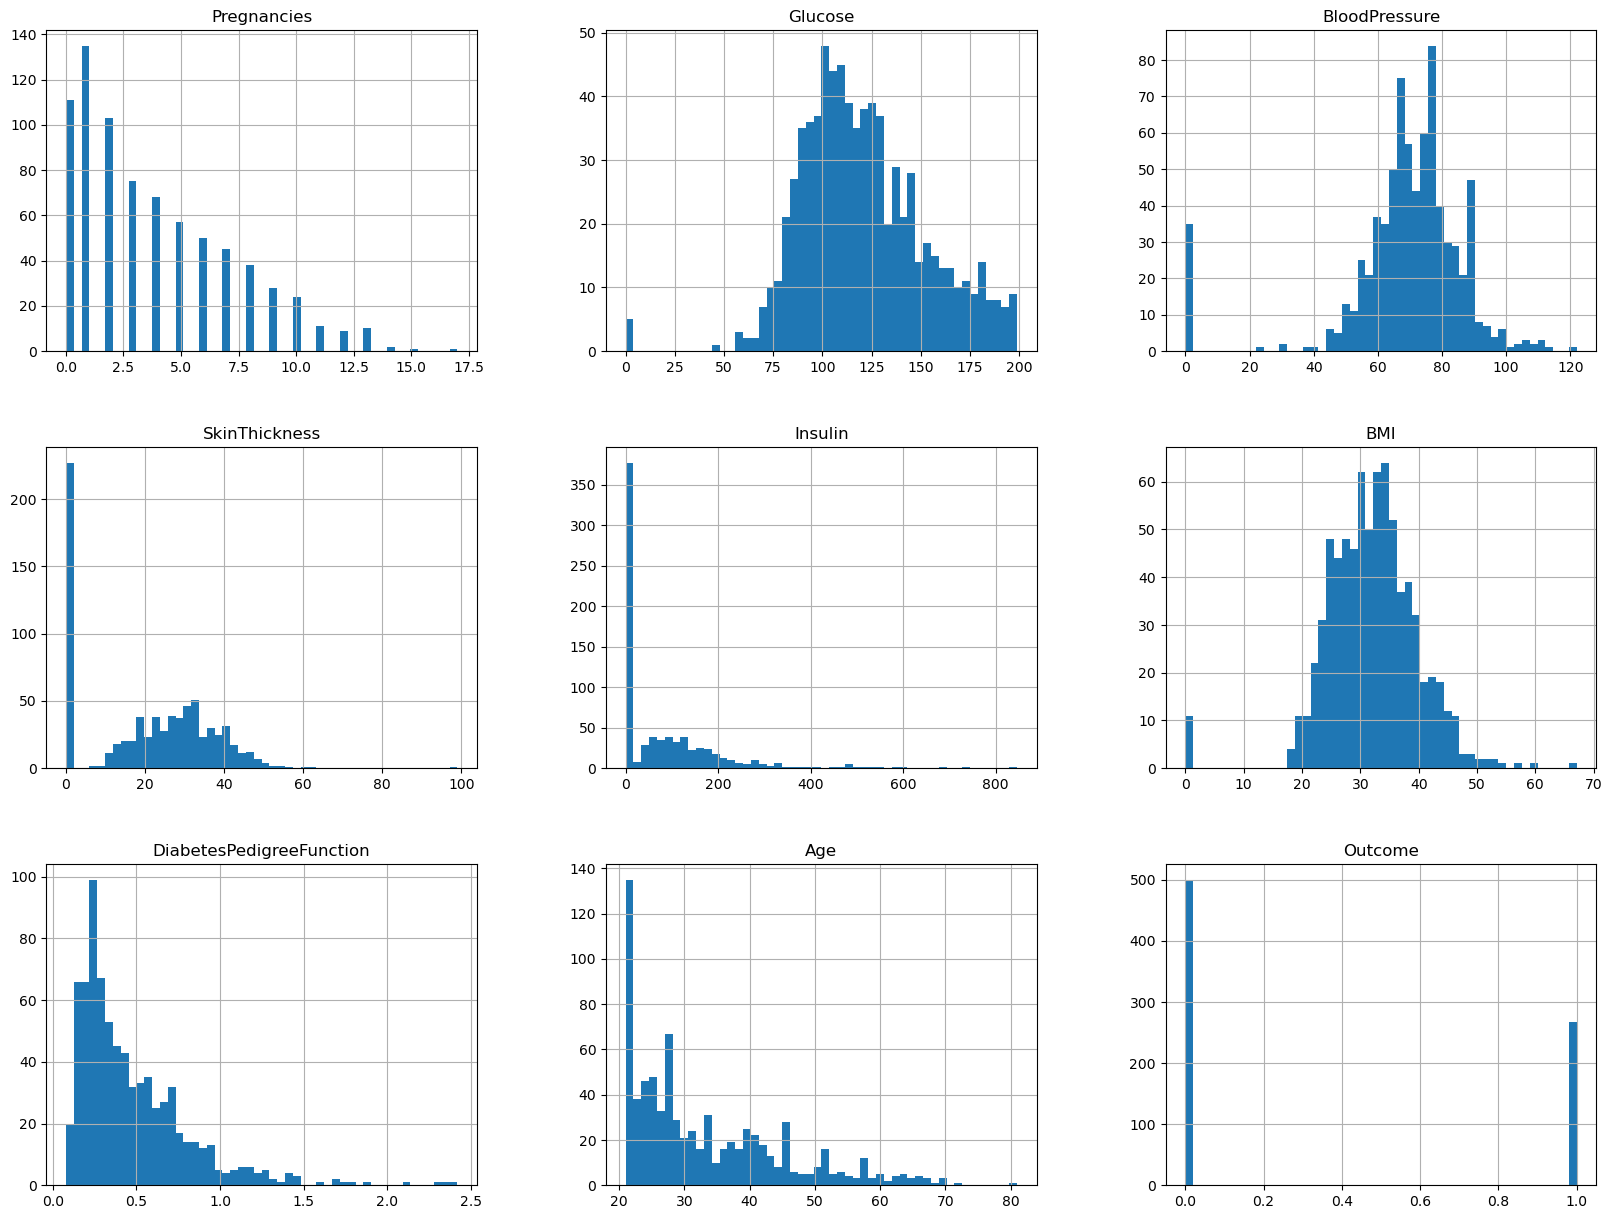

In [7]:
data.hist(bins=50,figsize=(20,15))
plt.show();

# Начнем с обработки данных. Организуем ее проведение через pipeline:

In [8]:
empty_cols = [column for column in data.columns if column not in ['Outcome', 'Pregnancies']]
non_id_cols = [column for column in data.columns if column != 'Outcome']


imputer = SimpleImputer(missing_values=0, strategy='median')
empty_transformer = ColumnTransformer(
    [('impute', imputer, empty_cols)],
    remainder='passthrough',    #Остальные столбцы не трогаем
    verbose_feature_names_out=False)    #Не добавляем префикс к названиям столбцов   
empty_transformer.set_output(transform='pandas')  #Выводим в таблицу, а не в массив

scaler = StandardScaler()
scale_transformer = ColumnTransformer(
    [('scale', scaler, non_id_cols)],
    remainder='passthrough',    #Остальные столбцы не трогаем
    verbose_feature_names_out=False)    #Не добавляем префикс к названиям столбцов   
scale_transformer.set_output(transform="pandas")  #Выводим в таблицу, а не в массив

preproc_pipeline = Pipeline([
    ('imputer', empty_transformer),
    ('scaler', scale_transformer)]
)
preproc_pipeline

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  SimpleImputer(missing_values=0,
                                                                strategy='median'),
                                                  ['Glucose', 'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])],
                                   verbose_feature_names_out=False)),
                ('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])],
                                   verbose_feature_names_out=False))])

In [9]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Разделим входные данные на две выборки - обучающую и тестовую:

In [10]:
df=data.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

data = df[non_id_cols]
labels= df['Outcome']

shuffle = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=12345)

for idx_train, idx_test in shuffle.split(data, labels):
    pass

X_test = data.iloc[idx_test]
y_test = labels.iloc[idx_test]

X_train = data.iloc[idx_train]
y_train = labels.iloc[idx_train]

Разработаем пайплайн для обучения и кросс-валидации

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score
import pickle

classifiers = {
    'logistic_regression': (LogisticRegression(solver='saga', max_iter = 200, random_state=123),
        {'clf__C': uniform(loc=0.1, scale=10), 'clf__penalty': ['l2', 'l1']}),
    'support_vectors': (SVC(kernel='poly'),
        {'clf__C': uniform(loc=0.1, scale=10), 'clf__degree': randint(2,5), 
        'clf__gamma': uniform(loc = 0, scale = 1), 'clf__coef0': uniform(loc=-1, scale=2)}),
    'knn': (KNeighborsClassifier(),
        {'clf__n_neighbors': randint(2,10), 'clf__p': randint(1,3)}),
    'bayes': (GaussianNB(),
        {'clf__var_smoothing': uniform(loc=1e-10, scale=1)}),
    'random_forest': (RandomForestClassifier(random_state=123),
        {'clf__n_estimators': randint(100,300), 'clf__max_features': ['sqrt', 'log2'], 
        'clf__min_samples_split': randint(2,5)}
    )
}

dataframe = pd.DataFrame(['accuracy', 'recall', 'precision', 'ROC AUC curve'])

for name, values in classifiers.items():
    clf, params = values
    pipeline = Pipeline([
        ("preproc", preproc_pipeline),
        ('clf', clf)]
    )
    model = RandomizedSearchCV(pipeline, params)

    model.fit(X_train, y_train)

    with open(f"saved_models/{name}.pkl", "wb") as file:
        pickle.dump(model, file, protocol=3)
    with open(f"hyperparams/{name}.txt", "w") as file:
        file.write(str(model.best_params_))
    print(name)
    print(model.best_params_, '\n' + '=' * 20)

    y_pred = model.predict(X_test)
    y_true = np.array(y_test)

    dataframe[name] = [accuracy_score(y_true, y_pred), recall_score(y_true, y_pred), 
    precision_score(y_true, y_pred), roc_auc_score(y_true, y_pred)]

    print(  f'Confusion matrix:\n {confusion_matrix(y_true, y_pred)}\n'
    )

dataframe


FileNotFoundError: [Errno 2] No such file or directory: 'saved_models/logistic_regression.pkl'